In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sn


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import optuna
import xgboost as xgb

In [2]:
#pip install xgboost

In [3]:
#pip install optuna

In [4]:
# load the dataset
df = pd.read_csv('faults.csv')

# Basic Understanding of data

In [6]:
#to know how big dataset is
df.shape

(1941, 34)

In [7]:
# to know how data looks like
df.sample(10)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
1856,0,27,1359864,1359867,63,28,7,7045,80,156,...,-0.8889,-0.1264,0.1862,0,0,0,0,0,0,1
119,1568,1583,564536,564621,762,63,86,78455,88,124,...,0.8235,-0.1956,0.9985,1,0,0,0,0,0,0
1001,814,823,119924,119932,52,10,8,4695,74,103,...,-0.1111,-0.2946,0.1773,0,0,0,0,0,1,0
472,41,192,1647218,1647385,13699,587,352,1585785,37,141,...,0.0958,-0.0956,1.0000,0,0,1,0,0,0,0
1837,108,117,80480,80500,105,17,21,16675,151,172,...,0.5500,0.2407,0.3068,0,0,0,0,0,0,1
1413,1049,1059,764081,764092,70,12,11,7279,82,125,...,0.0909,-0.1876,0.2173,0,0,0,0,0,0,1
396,0,224,418600,418798,20894,1169,712,2529140,18,143,...,-0.1161,-0.0543,1.0000,0,0,1,0,0,0,0
1729,15,29,1084661,1084680,128,17,21,14278,104,119,...,0.2632,-0.1285,0.4399,0,0,0,0,0,0,1
112,1687,1696,150712,150740,167,24,28,9559,23,94,...,0.6786,-0.5528,0.4170,1,0,0,0,0,0,0
816,50,71,143784,143858,578,73,90,67901,100,132,...,0.7162,-0.0822,0.9998,0,0,0,0,1,0,0


In [8]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [9]:
# here the last 7 columns represent fault classes so i will convert the 7 columns into a single one and remove the unnecessary columns.
# Check if any row has multiple fault labels
target_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

def check_multilabel(df, target_columns):
    multilabel_rows = df[target_columns].sum(axis=1) > 1
    if multilabel_rows.any():
        print("This is a multi-label classification problem.")
        print(f"Total multi-label rows: {multilabel_rows.sum()}")
    else:
        print("This is a multi-class classification problem.")
        
check_multilabel(df,target_columns)


This is a multi-class classification problem.


In [10]:
#converting into single column
df['Fault_type'] = df[target_columns].idxmax(axis = 1)
df=df.drop(target_columns, axis=1)

df.sample(10)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault_type
404,41,222,592614,592819,17887,713,448,2156667,21,143,...,0.2539,0.4576,1.0,4.2525,2.2577,2.3117,0.1171,-0.0580,1.0000,K_Scatch
253,484,513,1457758,1457776,196,52,35,22534,104,127,...,0.5577,0.5143,0.0,2.2923,1.4624,1.2553,-0.3793,-0.1018,0.8123,Z_Scratch
327,15,22,2857887,2857900,71,11,13,6657,81,108,...,0.6364,1.0000,1.0,1.8513,0.8451,1.1139,0.4615,-0.2675,0.1965,Z_Scratch
1815,550,558,2426501,2426519,109,15,18,12587,103,135,...,0.5333,1.0000,1.0,2.0374,0.9031,1.2553,0.5556,-0.0978,0.2583,Other_Faults
1637,21,74,5367324,5367377,784,66,54,82565,67,133,...,0.8030,0.9815,0.5,2.8943,1.7243,1.7243,0.0000,-0.1772,1.0000,Other_Faults
1098,787,1316,3544454,3544490,8391,609,343,991612,103,140,...,0.8686,0.1050,0.0,3.9238,2.7235,1.5563,-0.9319,-0.0768,1.0000,Bumps
1242,634,655,5303273,5303295,336,30,25,35912,79,127,...,0.7000,0.8800,1.0,2.5263,1.3222,1.3424,0.0454,-0.1650,0.7436,Bumps
655,41,218,2187237,2187305,6010,257,123,626586,39,126,...,0.6887,0.5529,0.0,3.7789,2.2480,1.8325,-0.6158,-0.1855,1.0000,K_Scatch
150,18,26,471253,471281,168,24,28,20267,102,143,...,0.3333,1.0000,1.0,2.2253,0.9031,1.4472,0.7143,-0.0575,0.3725,Pastry
108,1155,1167,2124816,2124840,165,22,26,18742,87,134,...,0.5454,0.9231,1.0,2.2175,1.0792,1.3802,0.5000,-0.1126,0.4763,Pastry


In [11]:
# to know datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [12]:
# to check missing values
df.isnull().sum()
# here there is no missing values

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Fault_type               0
dtype: int64

In [13]:
# to know how data looks mathematically
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000


In [14]:
# to know duplicate values
df.duplicated().sum()

0

# EDA

In [16]:
df['Fault_type'].value_counts()

Fault_type
Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: count, dtype: int64

In [17]:
df.nunique()

X_Minimum                 962
X_Maximum                 994
Y_Minimum                1939
Y_Maximum                1940
Pixels_Areas              920
X_Perimeter               399
Y_Perimeter               317
Sum_of_Luminosity        1909
Minimum_of_Luminosity     161
Maximum_of_Luminosity     100
Length_of_Conveyer         84
TypeOfSteel_A300            2
TypeOfSteel_A400            2
Steel_Plate_Thickness      24
Edges_Index              1387
Empty_Index              1338
Square_Index              770
Outside_X_Index           454
Edges_X_Index             818
Edges_Y_Index             648
Outside_Global_Index        3
LogOfAreas                914
Log_X_Index               183
Log_Y_Index               217
Orientation_Index         918
Luminosity_Index         1522
SigmoidOfAreas            388
Fault_type                  7
dtype: int64

In [18]:
df['TypeOfSteel_A300'].unique()

array([1, 0], dtype=int64)

In [19]:
df['TypeOfSteel_A400'].unique()

array([0, 1], dtype=int64)

In [20]:
df['Outside_Global_Index'].unique()

array([1. , 0.5, 0. ])

In [21]:
# Rename multiple columns
df.rename(columns={'TypeOfSteel_A300': 'A300', 'TypeOfSteel_A400': 'A400'}, inplace=True)


In [22]:
#converting the 2 type of steel column into a single one
type_of_steel = ['A300','A400']
df['Steel_type'] = df[type_of_steel].idxmax(axis = 1)
df=df.drop(type_of_steel, axis=1)

In [23]:
df.sample(5)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault_type,Steel_type
556,41,184,356230,356279,4331,178,108,450619,45,126,...,0.4537,0.0,3.6366,2.1553,1.6902,-0.6573,-0.1872,1.0000,K_Scatch,A400
90,320,333,4383724,4383776,437,36,52,44883,63,132,...,1.0000,1.0,2.6405,1.1139,1.7160,0.7500,-0.1976,0.9236,Pastry,A400
117,1571,1583,435871,435916,379,35,45,37695,80,124,...,1.0000,1.0,2.5786,1.0792,1.6532,0.7333,-0.2230,0.8299,Pastry,A400
1640,462,472,10369596,10369620,150,17,24,17768,105,132,...,1.0000,1.0,2.1761,1.0000,1.3802,0.5833,-0.0746,0.3977,Other_Faults,A400
745,778,782,1292292,1292296,12,4,4,1537,112,149,...,1.0000,0.5,1.0792,0.6021,0.6021,0.0000,0.0007,0.1292,Stains,A400


In [24]:
df['Steel_type'].value_counts()

Steel_type
A400    1164
A300     777
Name: count, dtype: int64

Number of outliers detected: 824


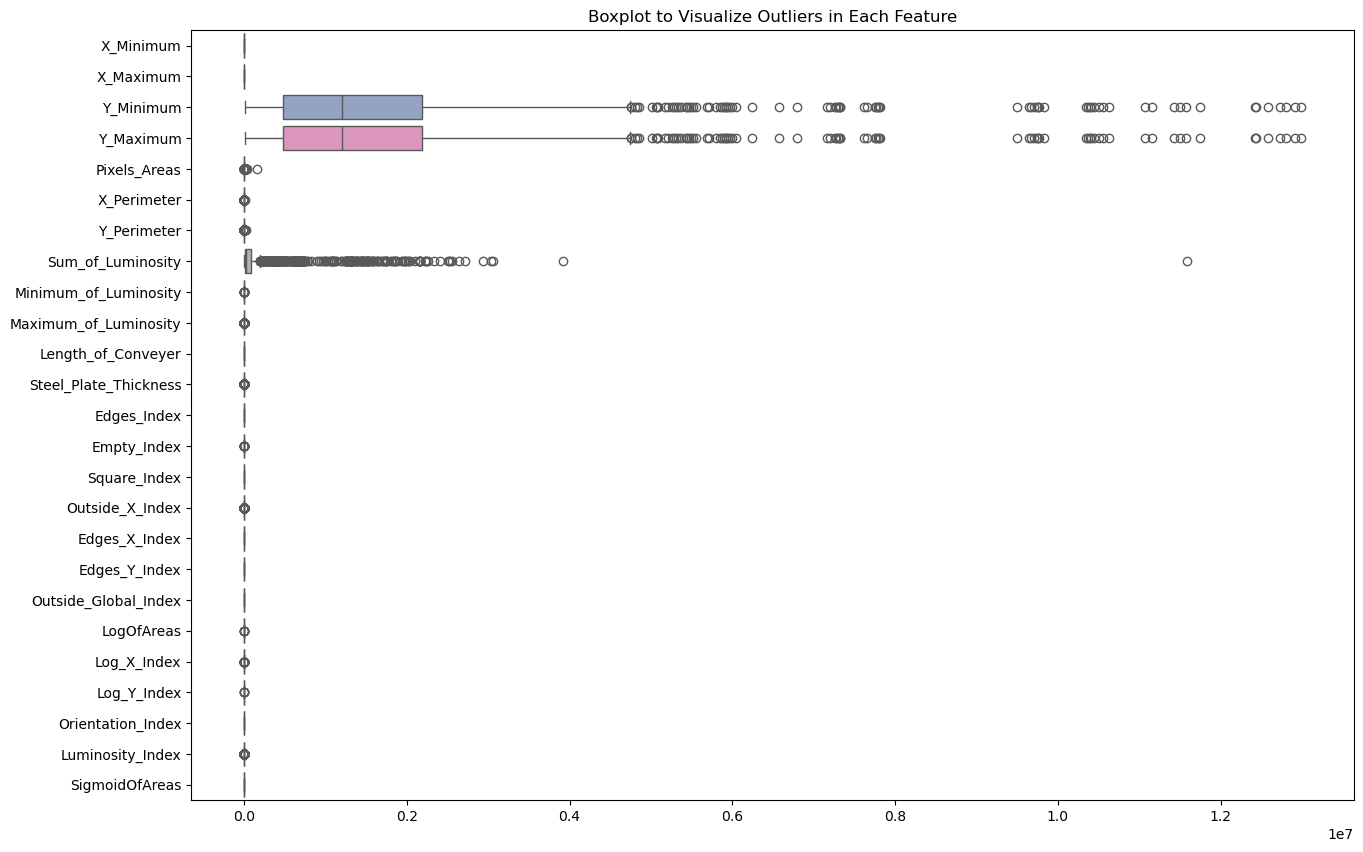

In [25]:
categorical_col = ['Fault_type','Steel_type']
dfn = df.drop(columns =categorical_col)
#  Detect Outliers using IQR
Q1 = dfn.quantile(0.25)
Q3 = dfn.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR from Q1 and Q3
outliers = ((dfn < (Q1 - 1.5 * IQR)) | (dfn > (Q3 + 1.5 * IQR))).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()
print(f"Number of outliers detected: {num_outliers}")

# Step 2: Visualize Outliers
plt.figure(figsize=(15, 10))
sn.boxplot(data=dfn, orient="h", palette="Set2")
plt.title("Boxplot to Visualize Outliers in Each Feature")
plt.show()


# visualization


<Axes: xlabel='Fault_type', ylabel='count'>

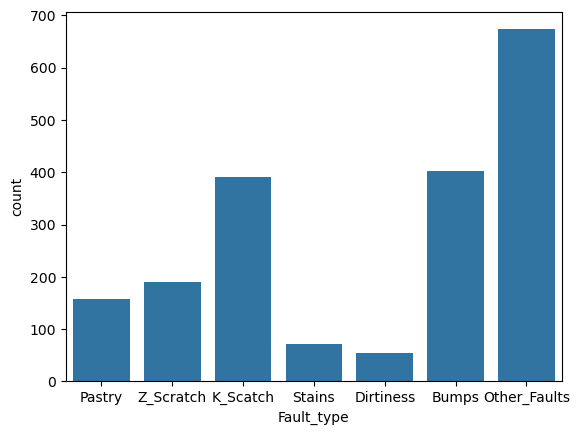

In [27]:
sn.countplot(df , x= "Fault_type" )

<Axes: xlabel='Steel_type', ylabel='count'>

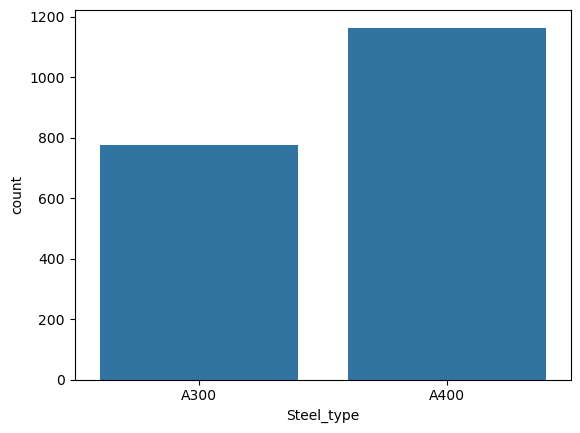

In [28]:
sn.countplot(df , x= "Steel_type")

<Axes: xlabel='Fault_type', ylabel='count'>

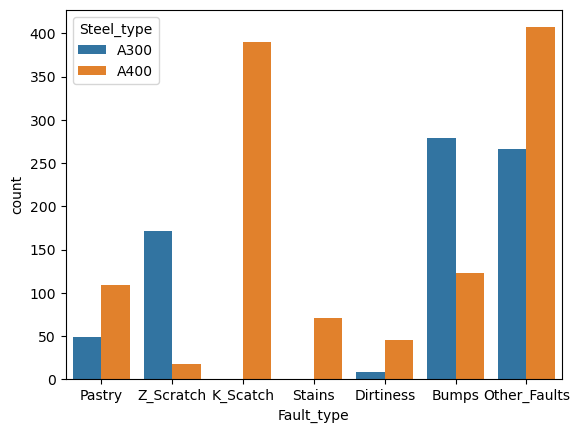

In [29]:
sn.countplot(df , x= "Fault_type", hue = "Steel_type" )

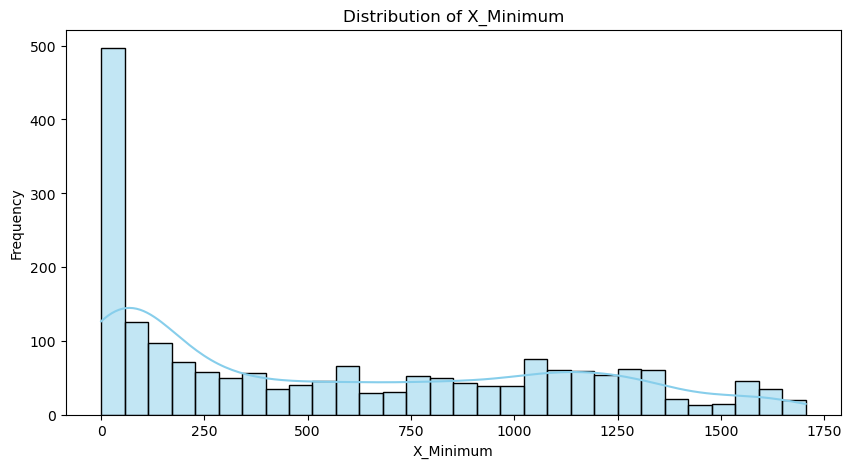

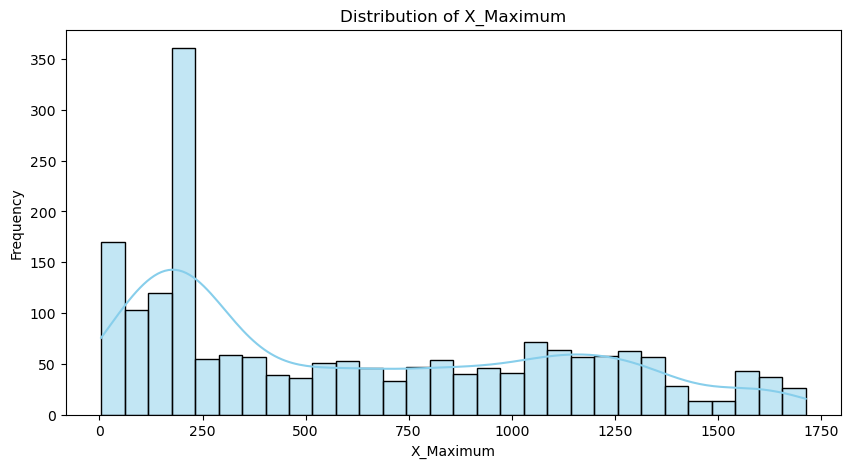

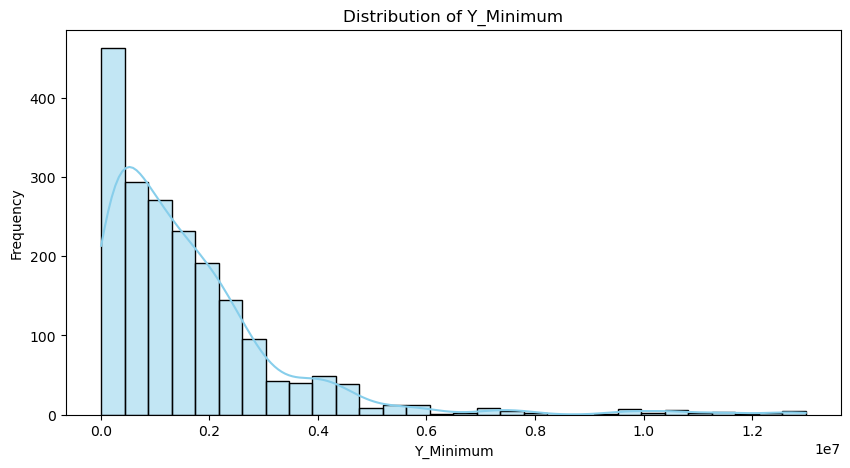

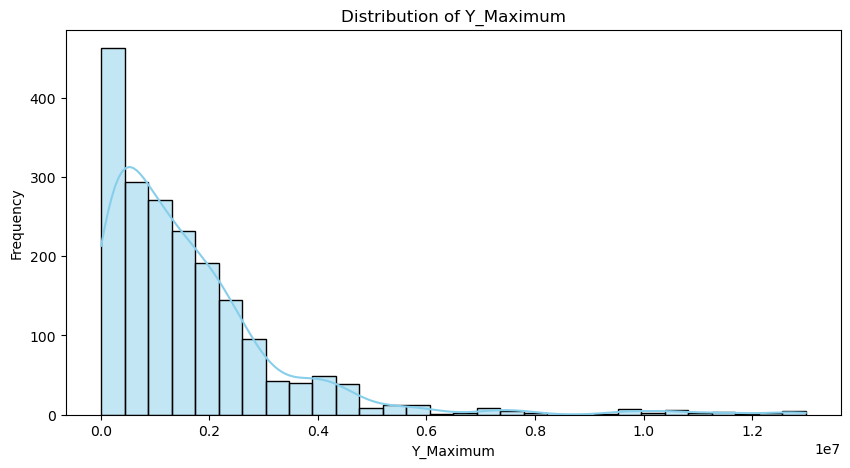

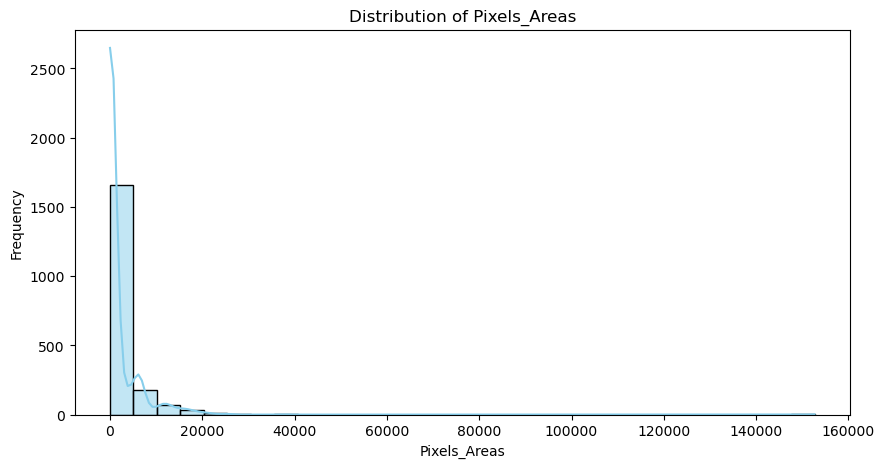

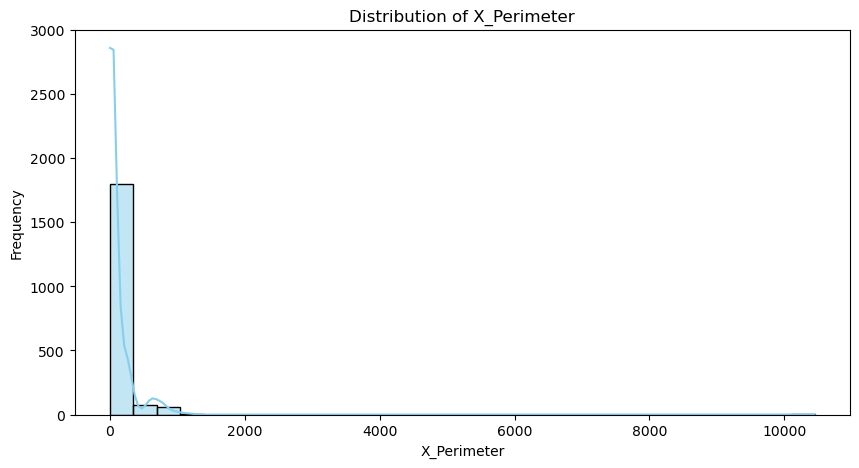

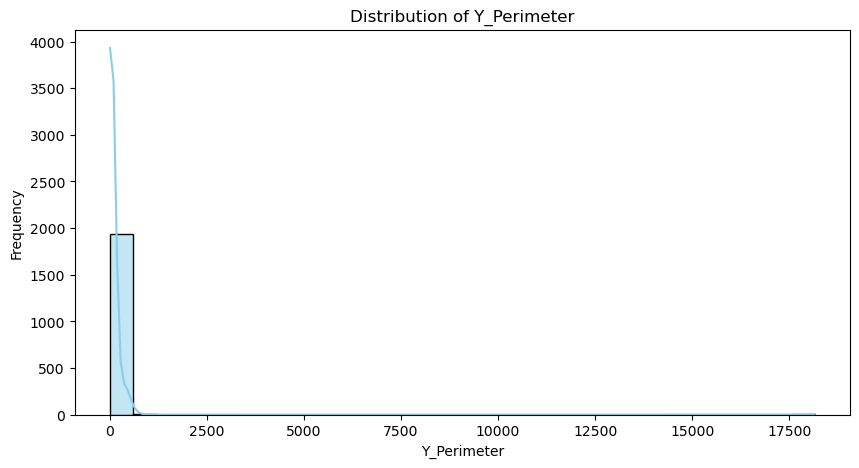

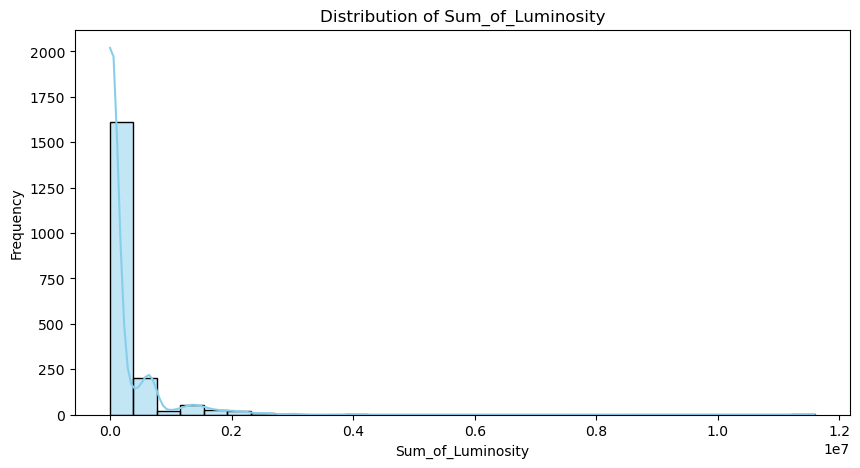

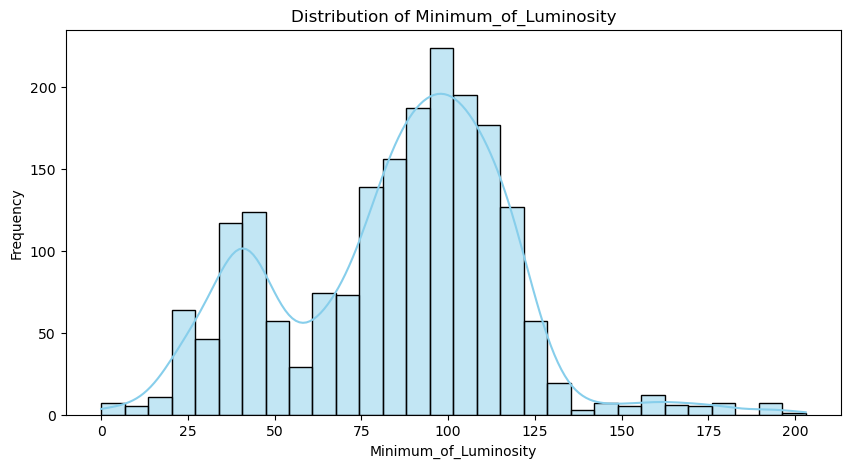

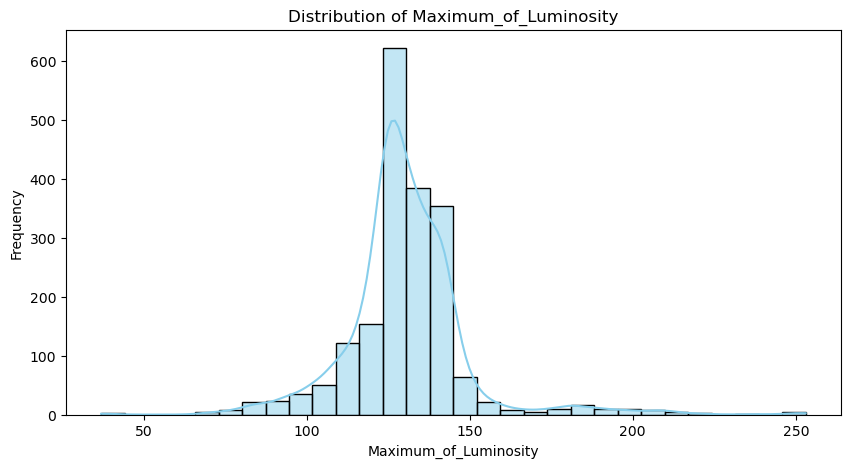

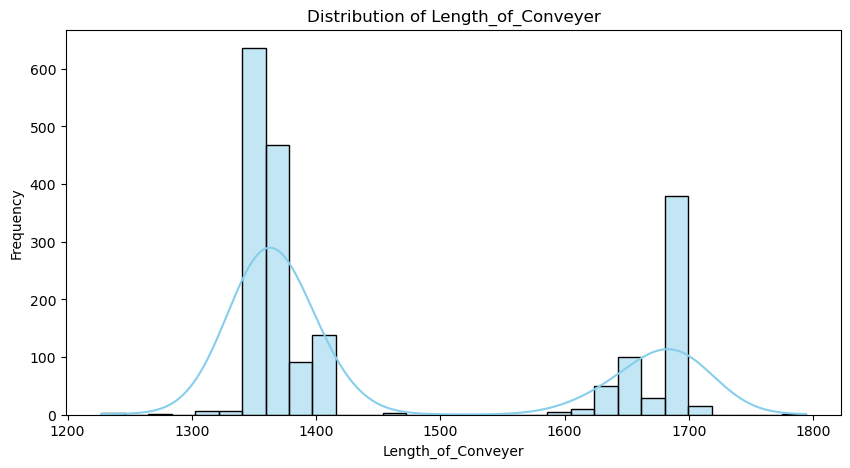

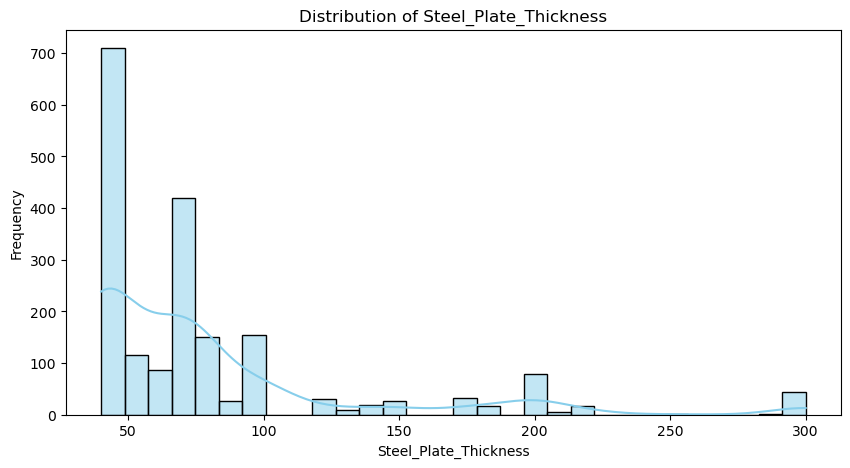

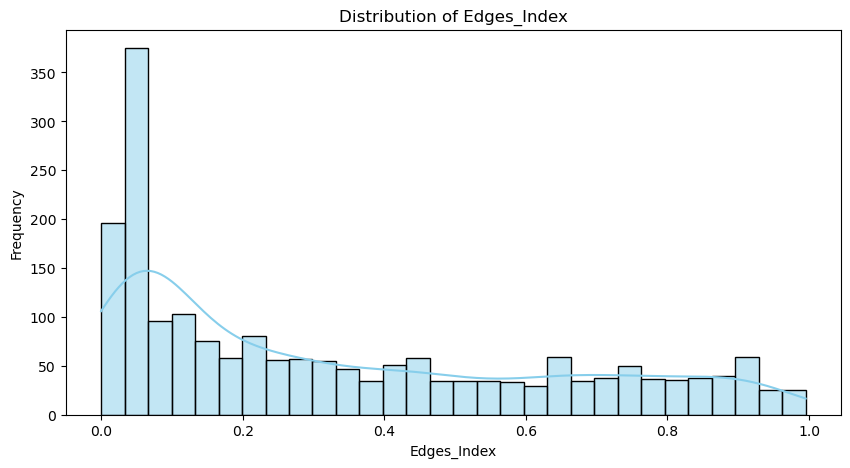

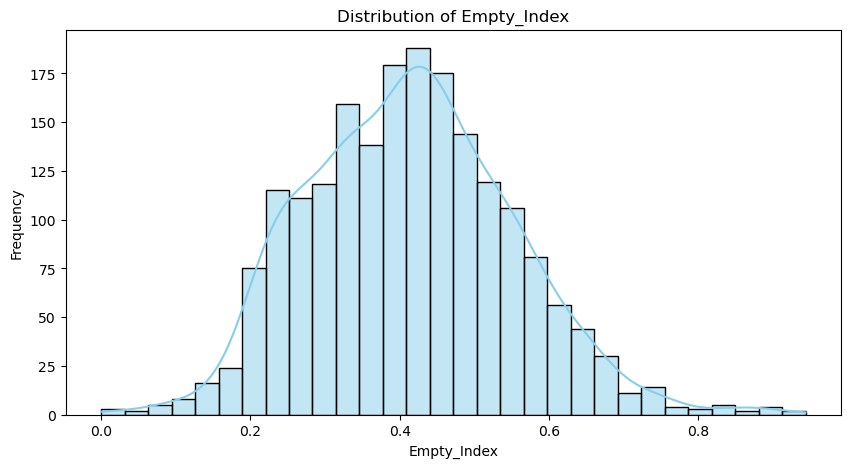

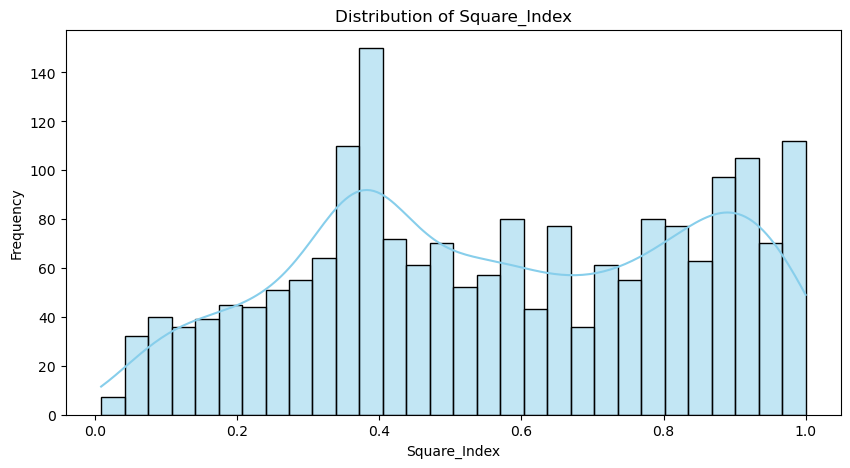

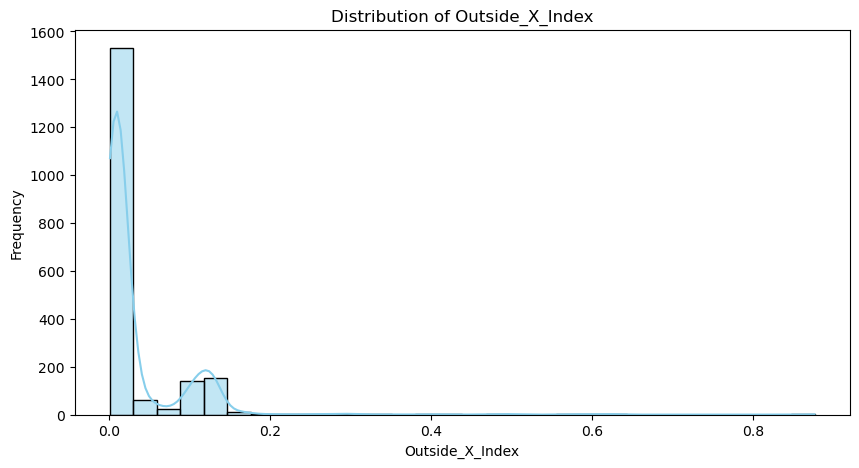

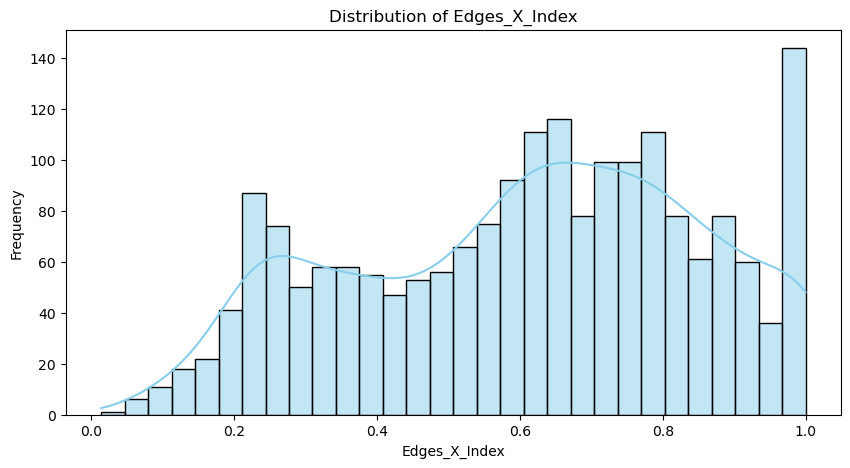

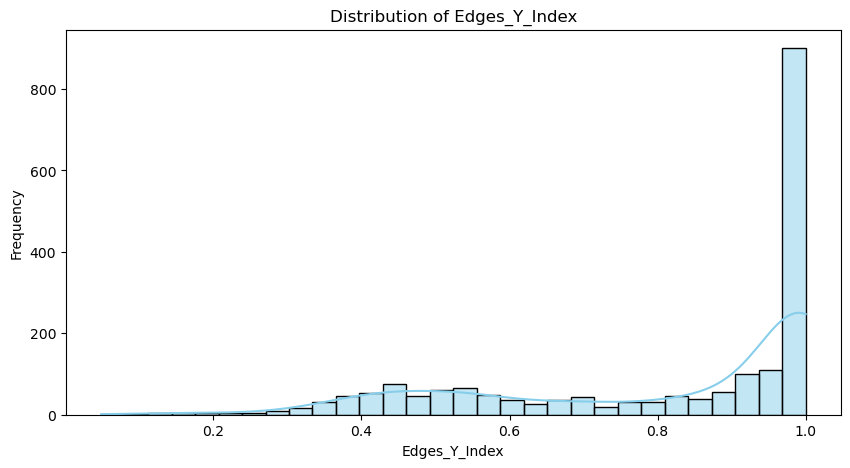

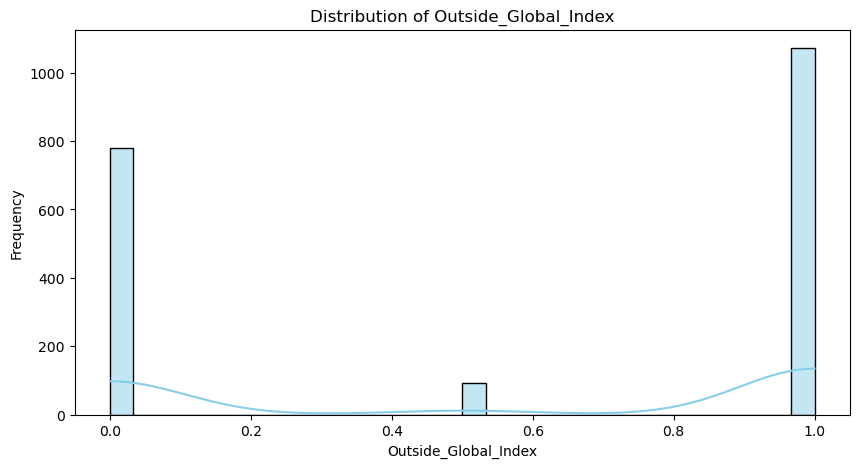

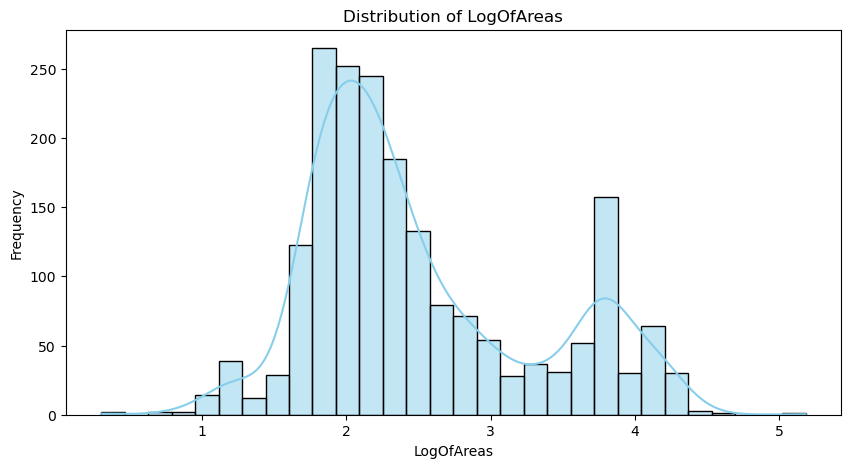

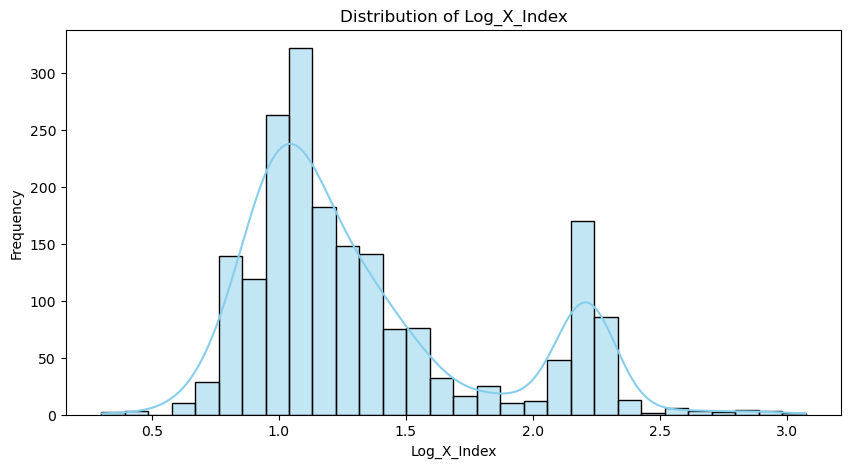

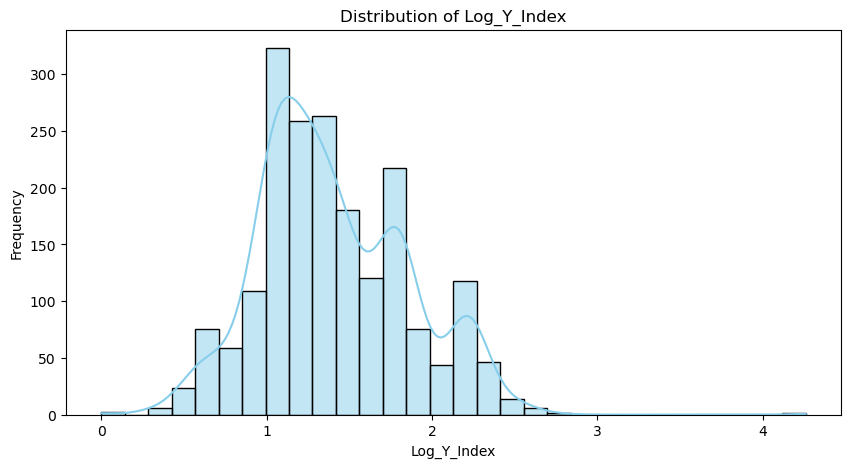

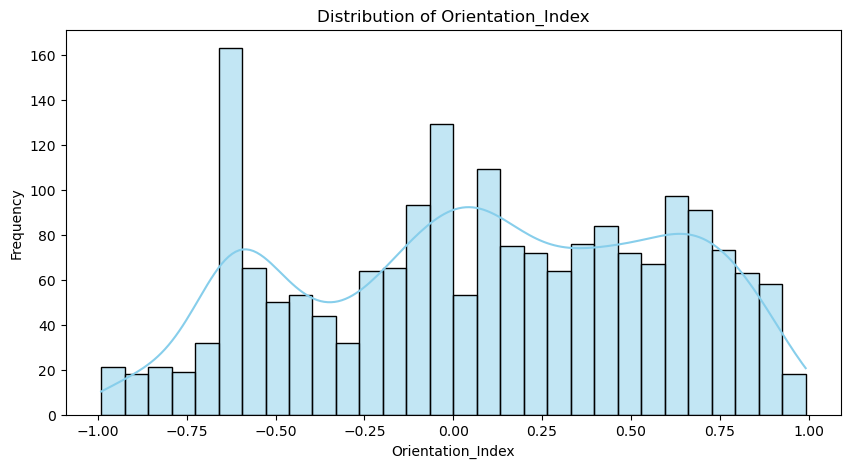

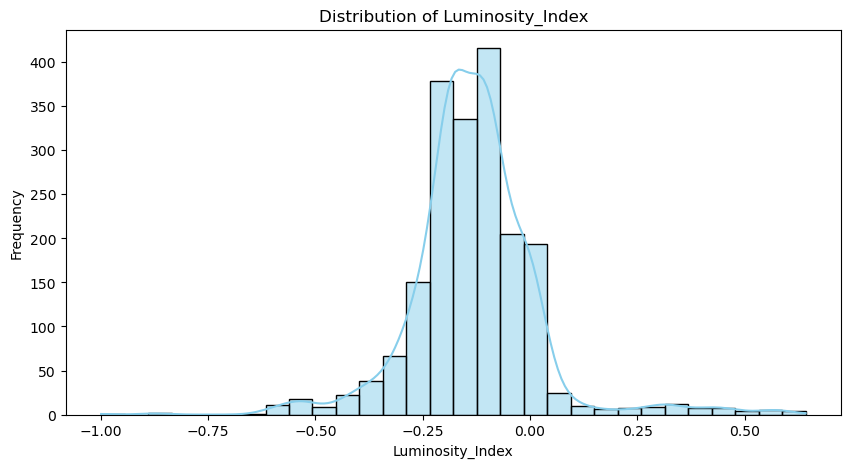

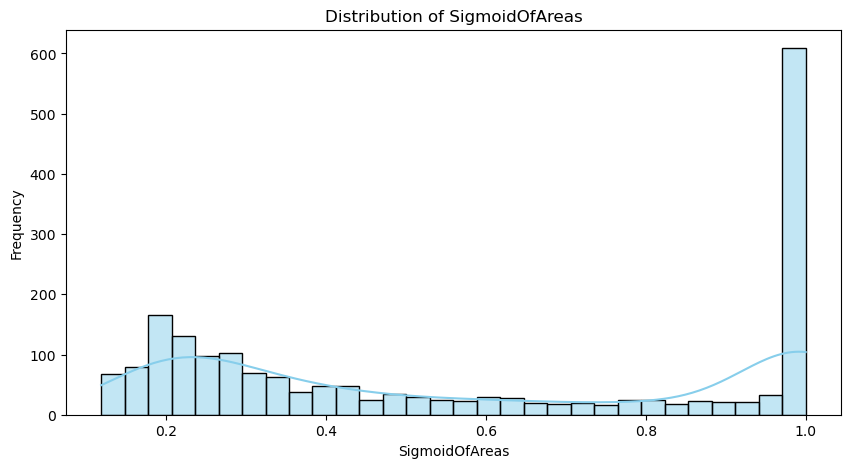

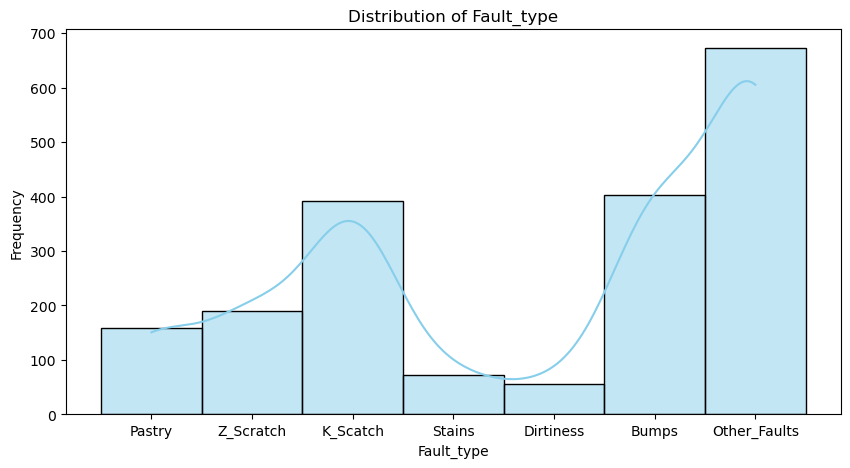

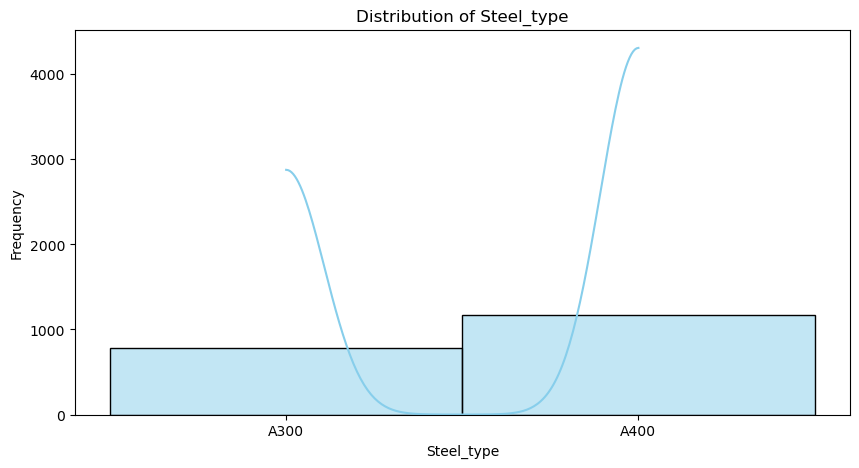

In [30]:
# Plot distribution for each feature in the dataset
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sn.histplot(df[column], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

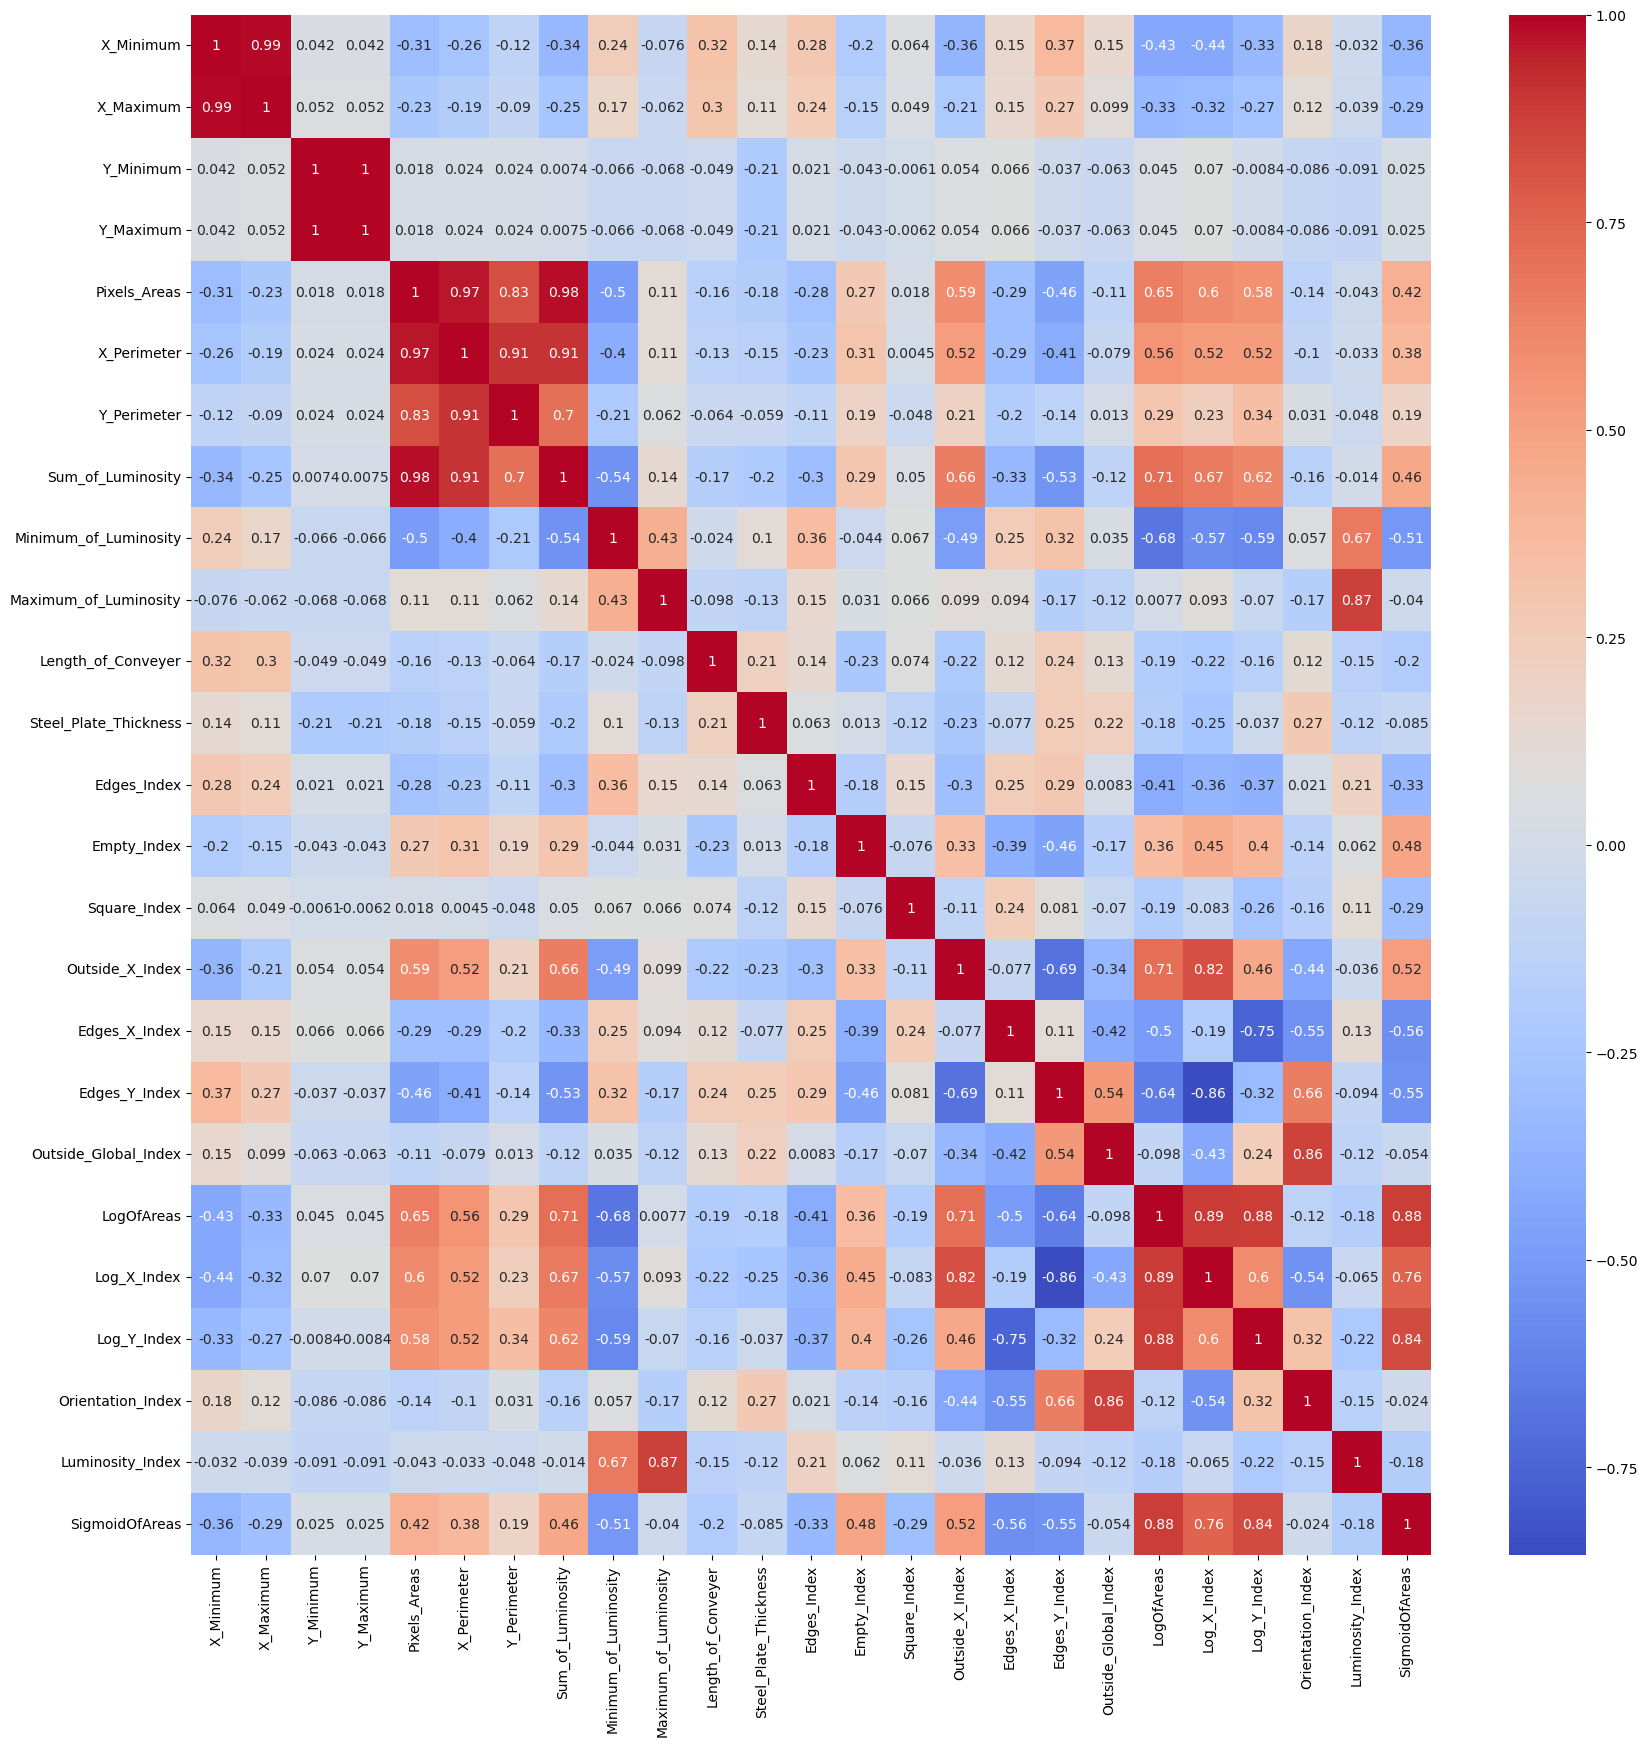

Strongly correlated feature pairs:
         Feature1           Feature2  Correlation
0       X_Minimum          X_Maximum     0.988314
47      Y_Minimum          Y_Maximum     1.000000
90   Pixels_Areas        X_Perimeter     0.966644
92   Pixels_Areas  Sum_of_Luminosity     0.978952
110   X_Perimeter        Y_Perimeter     0.912436
111   X_Perimeter  Sum_of_Luminosity     0.912956


In [31]:
categorical_col = ['Fault_type','Steel_type']
dfn = df.drop(columns =categorical_col)

corr_matrix = dfn.corr()
plt.figure(figsize=(20, 20))
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

threshold = 0.9
# Create a mask to ignore the upper triangle and self-correlations
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Extract the pairs that meet the correlation threshold
strong_corr_pairs = corr_matrix.where(mask).stack().reset_index()

# Rename columns for clarity
strong_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter pairs based on the threshold
strong_corr_pairs = strong_corr_pairs[(strong_corr_pairs['Correlation'] > threshold) | (strong_corr_pairs['Correlation'] < -threshold)]

# Display strong correlation pairs
print("Strongly correlated feature pairs:")
print(strong_corr_pairs)


# Modelling


In [33]:
# Encoding categorical
# encoding column Steel type
label_encoder = LabelEncoder()
df['Steel_type'] = label_encoder.fit_transform(df['Steel_type'])

#encoding target column
label_encoder = LabelEncoder()
df['Fault_type'] = label_encoder.fit_transform(df['Fault_type'])


In [34]:
# Feature selection
X = df.drop('Fault_type', axis=1)
y = df['Fault_type']

In [35]:
# Splitting the dataset with stratified sampling to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Handling class imbalance using SMOTE on the raw (unscaled) training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Feature scaling (Normalization) after SMOTE
scaler = MinMaxScaler()
X_train_res = scaler.fit_transform(X_train_res)  # Fit on resampled data
X_test = scaler.transform(X_test)  # Transform the test data

print(f"Training set shape after SMOTE: {X_train_res.shape}, {y_train_res.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")


Training set shape after SMOTE: (3297, 26), (3297,)
Test set shape: (583, 26), (583,)


In [39]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

#K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn_model.fit(X_train_res, y_train_res)
y_pred_knn = knn_model.predict(X_test)

print("\nK-Nearest Neighbors Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Decision Tree Classifier Results:
Accuracy: 0.7015437392795884
Confusion Matrix:
 [[ 66   4   0  32  15   3   1]
 [  0  15   0   2   0   0   0]
 [  1   0 108   7   1   0   0]
 [ 36   6   7 126  22   2   3]
 [ 10   3   0  10  24   0   0]
 [  2   0   2   2   0  16   0]
 [  1   0   0   2   0   0  54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.55      0.56       121
           1       0.54      0.88      0.67        17
           2       0.92      0.92      0.92       117
           3       0.70      0.62      0.66       202
           4       0.39      0.51      0.44        47
           5       0.76      0.73      0.74        22
           6       0.93      0.95      0.94        57

    accuracy                           0.70       583
   macro avg       0.69      0.74      0.70       583
weighted avg       0.71      0.70      0.70       583


K-Nearest Neighbors Classifier Results:
Accuracy: 0.6878216123499142
Confusion

In [41]:
# Train the baseline Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_res, y_train_res)

# Predictions
y_pred = rf_clf.predict(X_test)

# Evaluate baseline performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71       121
           1       1.00      0.94      0.97        17
           2       0.96      0.93      0.95       117
           3       0.77      0.75      0.76       202
           4       0.56      0.77      0.65        47
           5       0.90      0.82      0.86        22
           6       0.92      0.84      0.88        57

    accuracy                           0.80       583
   macro avg       0.83      0.82      0.83       583
weighted avg       0.81      0.80      0.80       583

Accuracy Score: 0.7976

Confusion Matrix:
 [[ 86   0   0  26   7   1   1]
 [  0  16   0   1   0   0   0]
 [  1   0 109   6   1   0   0]
 [ 25   0   2 152  20   1   2]
 [  4   0   0   7  36   0   0]
 [  1   0   0   2   0  18   1]
 [  3   0   2   4   0   0  48]]


In [43]:
# Initialize and train the XGBoost model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train_res, y_train_res)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


C:\Users\firef\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:26:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69       121
           1       0.84      0.94      0.89        17
           2       0.97      0.95      0.96       117
           3       0.75      0.81      0.78       202
           4       0.56      0.62      0.59        47
           5       0.90      0.86      0.88        22
           6       0.98      0.95      0.96        57

    accuracy                           0.81       583
   macro avg       0.82      0.82      0.82       583
weighted avg       0.81      0.81      0.81       583

Accuracy Score: 0.8062

Confusion Matrix:
 [[ 78   3   0  31   8   1   0]
 [  0  16   0   1   0   0   0]
 [  0   0 111   5   1   0   0]
 [ 20   0   3 163  14   1   1]
 [  5   0   0  13  29   0   0]
 [  1   0   0   2   0  19   0]
 [  0   0   1   2   0   0  54]]


[I 2024-11-10 13:33:06,842] A new study created in memory with name: no-name-0d46927c-0cd4-4ff6-87b0-44a07dbffc43
[I 2024-11-10 13:33:07,959] Trial 0 finished with value: 0.8980891719745223 and parameters: {'learning_rate': 0.22331666661684543, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.5056489418558647, 'colsample_bytree': 0.651005495909846, 'n_estimators': 125}. Best is trial 0 with value: 0.8980891719745223.
[I 2024-11-10 13:33:09,091] Trial 1 finished with value: 0.8929329693660905 and parameters: {'learning_rate': 0.28639171603556995, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8348563668101472, 'colsample_bytree': 0.5312064063977584, 'n_estimators': 150}. Best is trial 0 with value: 0.8980891719745223.
[I 2024-11-10 13:33:13,072] Trial 2 finished with value: 0.8996057021534729 and parameters: {'learning_rate': 0.023050460240919564, 'max_depth': 8, 'min_child_weight': 4, 'subsample': 0.680608392773922, 'colsample_bytree': 0.6487731724191486, 'n_estimators': 2

Best Hyperparameters: {'learning_rate': 0.12010121509159316, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.5524866689203742, 'colsample_bytree': 0.7100327491504412, 'n_estimators': 201}
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       121
           1       0.89      0.94      0.91        17
           2       0.97      0.95      0.96       117
           3       0.77      0.81      0.79       202
           4       0.58      0.66      0.62        47
           5       0.90      0.86      0.88        22
           6       0.96      0.95      0.96        57

    accuracy                           0.82       583
   macro avg       0.83      0.84      0.83       583
weighted avg       0.82      0.82      0.82       583

Accuracy Score: 0.8182

Confusion Matrix:
 [[ 83   2   0  27   8   1   0]
 [  0  16   0   1   0   0   0]
 [  0   0 111   5   1   0   0]
 [ 20   0   3 163  13   1   2]
 [  4   0   0  12 

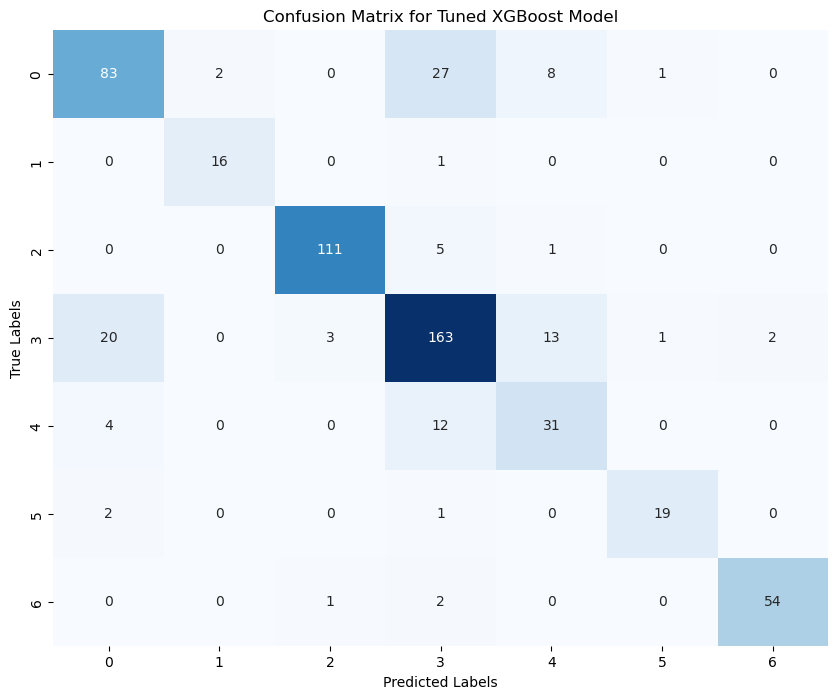

In [45]:
#hyperparameter tuning using optuna
# Define the Optuna objective function
def objective(trial):
    # Suggest hyperparameters for the XGBoost model
    params = {
        'objective': 'multi:softprob',  # Specify multi-class classification
        'eval_metric': 'mlogloss',  # Evaluation metric
        'num_class': len(np.unique(y_train_res)),  # Number of classes
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),  # Learning rate
        'max_depth': trial.suggest_int('max_depth', 3, 15),  # Maximum tree depth
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  # Minimum sum of instance weight
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),  # Subsample ratio
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),  # Subsample ratio of columns
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),  # Number of trees
        'random_state': 42
    }

    # Create the model
    model = xgb.XGBClassifier(**params)

    # Perform cross-validation to evaluate the model
    scores = cross_val_score(model, X_train_res, y_train_res, cv=3, scoring='accuracy')
    return scores.mean()

# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

#  Print the best hyperparameters
print("Best Hyperparameters:", study.best_params)

# Train the final XGBoost model with the best hyperparameters
best_params = study.best_params
final_xgb_model = xgb.XGBClassifier(**best_params)
final_xgb_model.fit(X_train_res, y_train_res)

# Evaluate the model on the test set
y_pred = final_xgb_model.predict(X_test)
y_proba = final_xgb_model.predict_proba(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 8))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Tuned XGBoost Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

